#### Load libraries

In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread("C:/Users/User/OneDrive/Pictures/Arafims.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
#### Rescaling imagees and video frames

def rescaleFrame(frame, scale = 0.5):
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)

    dimensions = (width, height)
    
    return cv2.resize(frame, dimensions, interpolation = cv2.INTER_AREA)

-1

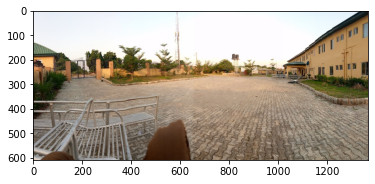

In [5]:
########## Read Image
################################
img = cv2.imread("C:/Users/User/OneDrive/Pictures/Arafims.jpg", cv2.IMREAD_GRAYSCALE)
resized_img = rescaleFrame(img)

plt.imshow(img_rgb)
#plt.imshow(resized_img)
cv2.waitKey() 
################################

In [9]:
np.array(img_gray).dtype

dtype('uint8')

In [10]:
np.ceil(np.random.randn(609, 1368) * 0.2)

array([[-0., -0.,  1., ...,  1.,  1.,  1.],
       [ 1., -0., -0., ..., -0.,  1.,  1.],
       [-0., -0.,  1., ..., -0.,  1., -0.],
       ...,
       [ 1., -0., -0., ..., -0.,  1.,  1.],
       [ 1., -0., -0., ..., -0., -0.,  1.],
       [-0., -0., -0., ...,  1., -0.,  1.]])

In [ ]:
########### Read Videos
################################
# capture = cv2.VideoCapture("C:/Users/User/Videos/4K Video Downloader/NEW LOWEST LANDING Wizzair Airbus A321neo Landing at Skiathos Airport   JSI Plane Spotting [4K].mp4")

# while True:
#     isTrue, frame = capture.read()
#     frame_resized = rescaleFrame(frame, scale=.2)


#     #cv2.imshow('Video', frame)
#     cv2.imshow('Video Resized', frame_resized)

#     if cv2.waitKey(20) & 0xFF == ord('q'):
#         break

# capture.release()
# cv2.destroyAllWindows()
################################

In [ ]:
########### Draw on images and Videos
##########################################
# blank = np.zeros((500, 500, 3), dtype = 'uint8')
# cv2.imshow('blank', blank)

## Color a part of the image
# blank[20:70, 20:70] = 0,255,0
# cv2.imshow('New', blank)

## Draw a rectangle
# cv2.rectangle(blank, (0,0), (200, 200), (255,0,0), thickness=1) #Specify thickness = -1 or cv2.
# cv2.imshow('Rectangle', blank)

## Draw a circle
# cv2.circle(blank, (125, 125), 40, (0,0,255), thickness = -1)
# cv2.imshow('Circle', blank)

## Draw a line
# cv2.line(blank, (0,0), (125, 125), (255,0,0), thickness=3)
# cv2.imshow('Line', blank)

## Write text
# cv2.putText(blank, 'Hey there!', (200, 200), cv2.FONT_HERSHEY_TRIPLEX 1.0, (255,255,255), thickness=2)
# cv2.imshow('Text', blank)

# cv2.waitKey()
######################################

In [ ]:
#### Basic functions
#############################
# img = cv2.imread("C:/Users/User/OneDrive/Pictures/Arafims.jpg")

# ## Convert to grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2.imshow('Grayscale', gray)

# ## Gaussian Blur
# blur = cv2.GaussianBlur(img, (3,3), cv2.BORDER_DEFAULT)
# cv2.imshow('Blur', blur)

# ## Canny Edge Detector
# canny = cv2.Canny(blur, 175, 175)
# cv2.imshow('Canny', canny)

# ## Cropping
# crop = img[:500, :500]
# cv2.imshow('Crop', crop)

# cv2.waitKey()
#######################################

In [ ]:
########### Image Transformations
####################################
## Translation
def translate(img, tx, ty):
    transMat = np.float32([[1, 0, tx], [0, 1, ty]])
    width = img.shape[1] 
    height = img.shape[0]
    dimensions = (width, height)
    return cv2.warpAffine(img, transMat, dimensions)

translated = translate(img, 100, 100) # Right and down by 100 px
translated2 = translate(img, -100, 100) # Left and down by 100 px

# cv2.imshow('Translated', translated2)

## Rotation
def rotate(img, angle, rotation_point = None):
    (height, width) = img.shape[:2] # We don't need the number of channels
    dimensions = (width, height)
    if rotation_point == None:
        rotation_point = (width // 2, height // 2)
    
    rotationMat = cv2.getRotationMatrix2D(rotation_point, angle, 1.0)
    return cv2.warpAffine(img, rotationMat, dimensions)

# rotated = rotate(img, 50, (20, 20))
# cv2.imshow('Rotated', rotated)

# ## Resizing
# resized = cv2.resize(img, (500,500), interpolation=cv2.INTER_AREA)
# cv2.imshow('Resized', resized)

# ## Flipping
# flipped = cv2.flip(img, -1)
# cv2.imshow('Flipped', flipped)



In [ ]:

########### Contour Detection
####################################
cv2.imshow('Arafims', img)

blank = np.zeros(img.shape, dtype='uint8')
# cv2.imshow('Blank', blank)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2.imshow('Gray', gray)

blur = cv2.GaussianBlur(gray, (3,3), cv2.BORDER_DEFAULT)
cv2.imshow('Blur', blur)

canny = cv2.Canny(blur, 125, 175)
cv2.imshow('Canny Edges', canny)

contours, heirarchy = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img, contours, -1, (0,0,255))
cv2.imshow('Contours Drawn', img)

# Print number of contours
print("Number of contours: " + str(len(contours)))
cv2.waitKey()